# Pips and imports

In [ ]:
%pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
%pip install pandas==1.3.3 pytorch-fid==0.2.1
%pip install wandb

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as F_
import numpy as np
import os
import PIL

from torchvision import transforms

In [2]:
#from generator import *
#from discriminator import *
#from losses import *
#from training import *
#from dataset import *
from pix2pix import *

In [3]:
from utils_real_fake import *

# Dataset



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
train_batch_size, val_batch_size, test_batch_size = 1,1,1

train_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

val_transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])
#Путь для Колаба
train_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/facades_dataset_right/train', transform=train_transform, aug=False)
val_dataset = ImageTrainDataSet('/content/drive/MyDrive/funkopop_gan/facades_dataset_right/test', transform=val_transform, aug=False)


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=train_batch_size)


val_loader = torch.utils.data.DataLoader(
    val_dataset,
    shuffle=True,
    batch_size=val_batch_size)



# Training without discriminator



In [20]:
#!g1.1
#wandb.init(project='funkopops L1')
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g = UNetModel().to(DEVICE)

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))

train_g(g,
          n_epochs=10,
          generator_opt=g_opt,

          train_loader=train_loader,
          val_loader=val_loader,
          num_model=1234567,

          logging=False,
          path_last_epoch='try_',
          path_best_model = 'best_try'
          )

100%|██████████| 400/400 [00:28<00:00, 13.99it/s]



epoch 0/10 0.3645765881240368


100%|██████████| 106/106 [00:34<00:00,  3.05it/s]



validation 0/10 0.34628623372541284


100%|██████████| 400/400 [00:25<00:00, 15.46it/s]



epoch 1/10 0.35232308980077504


100%|██████████| 106/106 [00:02<00:00, 35.97it/s]



validation 1/10 0.35022186052124454


100%|██████████| 400/400 [00:26<00:00, 15.35it/s]



epoch 2/10 0.34662266474217174


100%|██████████| 106/106 [00:02<00:00, 35.62it/s]



validation 2/10 0.34486807208016235


100%|██████████| 400/400 [00:26<00:00, 15.27it/s]



epoch 3/10 0.34557471226900816


100%|██████████| 106/106 [00:03<00:00, 35.15it/s]



validation 3/10 0.3397866542328079


100%|██████████| 400/400 [00:26<00:00, 15.16it/s]



epoch 4/10 0.342169552333653


100%|██████████| 106/106 [00:03<00:00, 34.86it/s]



validation 4/10 0.34136244275097577


100%|██████████| 400/400 [00:26<00:00, 15.10it/s]



epoch 5/10 0.339763950407505


100%|██████████| 106/106 [00:03<00:00, 35.08it/s]



validation 5/10 0.3450344203496879


100%|██████████| 400/400 [00:26<00:00, 15.03it/s]



epoch 6/10 0.33701556228101254


100%|██████████| 106/106 [00:02<00:00, 35.59it/s]



validation 6/10 0.3376127898974239


100%|██████████| 400/400 [00:26<00:00, 15.00it/s]



epoch 7/10 0.3344550870731473


100%|██████████| 106/106 [00:03<00:00, 35.22it/s]



validation 7/10 0.3474189544904907


100%|██████████| 400/400 [00:26<00:00, 14.96it/s]



epoch 8/10 0.33132364947348836


100%|██████████| 106/106 [00:02<00:00, 35.60it/s]



validation 8/10 0.3484770797614781


100%|██████████| 400/400 [00:26<00:00, 14.88it/s]



epoch 9/10 0.32867604594677685


100%|██████████| 106/106 [00:02<00:00, 35.95it/s]


validation 9/10 0.3411568212059309


In [21]:
torch.save(g.state_dict(), '/content/drive/MyDrive/funkopop_gan/models/facades_right_only_generator.pt')

# Testing baseline


In [22]:
g = UNetModel()
g.load_state_dict(torch.load('/content/best_try1234567.pt'))

<All keys matched successfully>

In [23]:
list_val = list(val_loader)

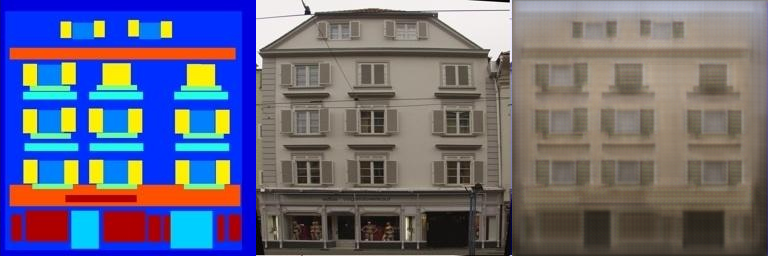

In [24]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

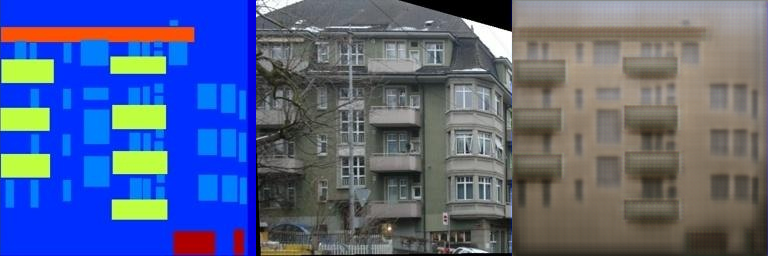

In [25]:
x_try, y_try = list_val[90]
depict_input_real_fake(g, x_try, y_try, norm=True)

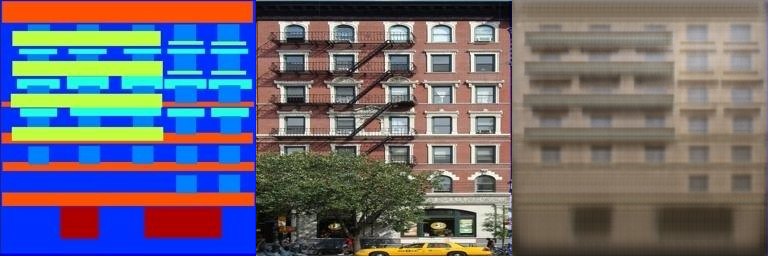

In [26]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

# Final model

In [27]:

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

g = UNetModel()
d = Discriminator()

g_opt = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))
d_opt = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))

train(g,
          d,
          n_epochs=20,
          generator_opt=g_opt,
          discriminator_opt=d_opt,
          train_loader=train_loader,
          val_loader=val_loader,
          num_model=701,
          logging=False,
          path_last_epoch='/content/drive/MyDrive/funkopop_gan/models/facades'
          )

100%|██████████| 400/400 [00:39<00:00, 10.08it/s]



epoch 0/20 g loss 40.21305686473846 d_loss 0.5279607465304434


100%|██████████| 106/106 [00:03<00:00, 30.13it/s]



val 0/20 g loss 41.84614300277998 d_loss 0.5477682678907547


100%|██████████| 400/400 [00:40<00:00,  9.90it/s]



epoch 1/20 g loss 40.758475360870364 d_loss 0.5524716883851215


100%|██████████| 106/106 [00:03<00:00, 30.74it/s]



val 1/20 g loss 38.39332868468087 d_loss 0.6494256917316958


100%|██████████| 400/400 [00:40<00:00,  9.81it/s]



epoch 2/20 g loss 40.341606173515316 d_loss 0.6398018200322986


100%|██████████| 106/106 [00:03<00:00, 31.29it/s]



val 2/20 g loss 38.80999476954622 d_loss 0.28912330250132756


100%|██████████| 400/400 [00:40<00:00,  9.84it/s]



epoch 3/20 g loss 40.40893702030182 d_loss 0.6263628492876887


100%|██████████| 106/106 [00:03<00:00, 31.55it/s]



val 3/20 g loss 37.23395788444663 d_loss 1.0992049923482932


100%|██████████| 400/400 [00:40<00:00,  9.84it/s]



epoch 4/20 g loss 40.26155077457428 d_loss 0.6143632336333394


100%|██████████| 106/106 [00:03<00:00, 31.39it/s]



val 4/20 g loss 38.160959243774414 d_loss 1.084216425441346


100%|██████████| 400/400 [00:40<00:00,  9.83it/s]



epoch 5/20 g loss 39.854957551956176 d_loss 0.650153270107694


100%|██████████| 106/106 [00:03<00:00, 30.58it/s]



val 5/20 g loss 39.26771369070377 d_loss 0.8007688773971684


100%|██████████| 400/400 [00:40<00:00,  9.86it/s]



epoch 6/20 g loss 39.55013664722443 d_loss 0.6047713179234415


100%|██████████| 106/106 [00:03<00:00, 30.93it/s]



val 6/20 g loss 40.34586391808852 d_loss 0.7219643020686114


100%|██████████| 400/400 [00:40<00:00,  9.85it/s]



epoch 7/20 g loss 39.027493586540224 d_loss 0.6802415549382568


100%|██████████| 106/106 [00:03<00:00, 31.54it/s]



val 7/20 g loss 40.06701750125525 d_loss 0.5011159025554387


100%|██████████| 400/400 [00:40<00:00,  9.83it/s]



epoch 8/20 g loss 38.65770748138428 d_loss 0.660243992805481


100%|██████████| 106/106 [00:03<00:00, 31.51it/s]



val 8/20 g loss 42.24688616338766 d_loss 0.9056620658990348


100%|██████████| 400/400 [00:40<00:00,  9.81it/s]



epoch 9/20 g loss 37.825721216201785 d_loss 0.7090688303858041


100%|██████████| 106/106 [00:03<00:00, 31.73it/s]



val 9/20 g loss 40.98886482670622 d_loss 0.48584300820838733


100%|██████████| 400/400 [00:40<00:00,  9.80it/s]



epoch 10/20 g loss 37.16957381248474 d_loss 0.6716072392836213


100%|██████████| 106/106 [00:03<00:00, 30.97it/s]



val 10/20 g loss 41.374302126326654 d_loss 0.990464323850454


100%|██████████| 400/400 [00:40<00:00,  9.84it/s]



epoch 11/20 g loss 36.108274898529054 d_loss 0.7089730070438236


100%|██████████| 106/106 [00:03<00:00, 30.24it/s]



val 11/20 g loss 39.90966397411418 d_loss 0.5003999050284894


100%|██████████| 400/400 [00:40<00:00,  9.83it/s]



epoch 12/20 g loss 35.290812473297116 d_loss 0.677559789698571


100%|██████████| 106/106 [00:03<00:00, 30.46it/s]



val 12/20 g loss 40.50069326724646 d_loss 0.5027888375422302


100%|██████████| 400/400 [00:40<00:00,  9.82it/s]



epoch 13/20 g loss 34.63156234741211 d_loss 0.689498756211251


100%|██████████| 106/106 [00:03<00:00, 31.42it/s]



val 13/20 g loss 41.45843158577973 d_loss 1.3327273085432232


100%|██████████| 400/400 [00:40<00:00,  9.83it/s]



epoch 14/20 g loss 33.89591183185578 d_loss 0.6976429098378867


100%|██████████| 106/106 [00:03<00:00, 31.58it/s]



val 14/20 g loss 39.74332347006168 d_loss 0.5458562874920526


100%|██████████| 400/400 [00:40<00:00,  9.82it/s]



epoch 15/20 g loss 32.78720411777496 d_loss 0.6856769039016217


100%|██████████| 106/106 [00:03<00:00, 31.56it/s]



val 15/20 g loss 40.32179080315356 d_loss 0.7507027516949851


100%|██████████| 400/400 [00:40<00:00,  9.84it/s]



epoch 16/20 g loss 31.988629837036132 d_loss 0.6766647141426801


100%|██████████| 106/106 [00:03<00:00, 30.92it/s]



val 16/20 g loss 39.4864777618984 d_loss 0.7559206693099355


100%|██████████| 400/400 [00:40<00:00,  9.88it/s]



epoch 17/20 g loss 31.658587999343872 d_loss 0.6945980635657907


100%|██████████| 106/106 [00:03<00:00, 30.47it/s]



val 17/20 g loss 39.12413591708777 d_loss 0.5301766278187059


100%|██████████| 400/400 [00:40<00:00,  9.88it/s]



epoch 18/20 g loss 30.610049476623534 d_loss 0.7094803483877331


100%|██████████| 106/106 [00:03<00:00, 30.78it/s]



val 18/20 g loss 39.58226939867128 d_loss 0.6038546671844879


100%|██████████| 400/400 [00:40<00:00,  9.89it/s]



epoch 19/20 g loss 29.433681974411012 d_loss 0.7135236993059516


100%|██████████| 106/106 [00:03<00:00, 31.65it/s]


val 19/20 g loss 41.79406311826886 d_loss 0.8030891666926865


# Testing final model

In [7]:
g = UNetModel()

g.load_state_dict(torch.load('/content/drive/MyDrive/funkopop_gan/models/facades/gen_701.pt'))

<All keys matched successfully>

In [28]:
list_val = list(val_loader)

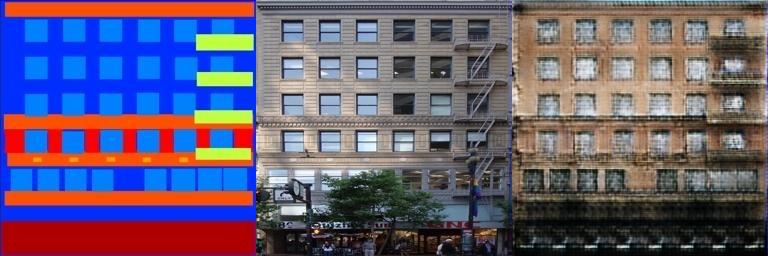

In [29]:
x_try, y_try = list_val[56]
depict_input_real_fake(g, x_try, y_try, norm=True)

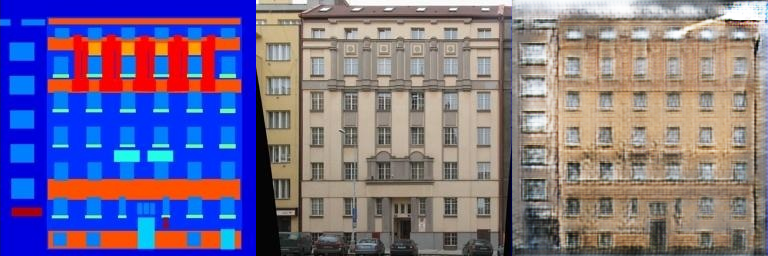

In [30]:
x_try, y_try = list_val[9]
depict_input_real_fake(g, x_try, y_try, norm=True)

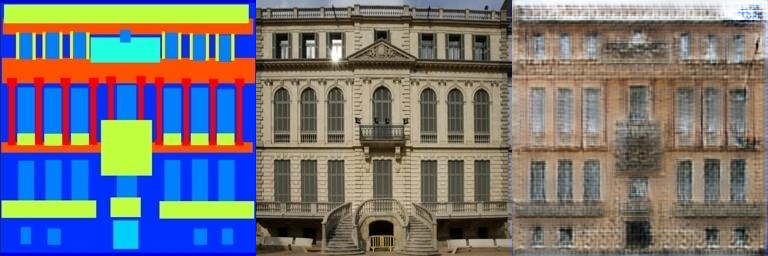

In [31]:
x_try, y_try = list_val[89]
depict_input_real_fake(g, x_try, y_try, norm=True)

In [32]:
list_train = list(train_loader)

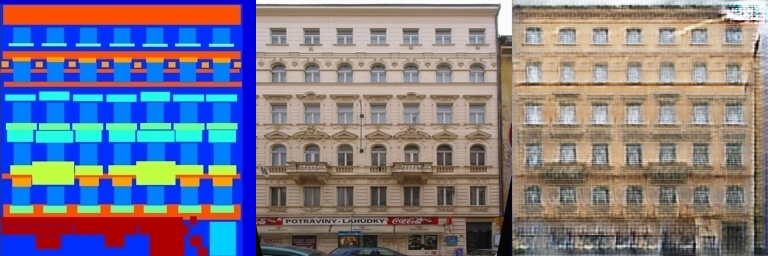

In [33]:
x_try, y_try = list_train[189]
depict_input_real_fake(g, x_try, y_try, norm=True)